# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Xintong Gu\
**Email:** xg2440@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

1. Segmentation Strategy Combining Model Generalization and Speaker-Specific Optimization

Designing an effective segmentation strategy for training, validation, and test sets hinges on ensuring model generalization to new speakers while leveraging additional datasets to optimize performance for a specific speaker (Kilian). To guarantee generalization to new speakers, we must employ a **speaker-independent** partitioning approach, meaning no speaker may appear more than once across any partitioned set (training, validation, testing).

2. Speaker-Independent Partitioning of the Original Dataset

For the original dataset containing recordings from 100 speakers, partitioning must occur at the speaker level. We randomly divided the 100 speakers into three mutually exclusive groups: for example, data from 70 speakers was used for the training set, data from 15 speakers for the validation set (used for tuning and early stopping), and data from the final 15 speakers was reserved for the test set. This partitioning ensures that the acoustic characteristics and pronunciation habits encountered by the model during testing are entirely unfamiliar, providing the most reliable assessment of the model's generalization ability.

3. Integrating the Kilian Dataset for Specific Optimization

To simultaneously meet the stringent performance requirements for Kilian, we employ model fine-tuning. We internally partition Kilian's 10,000 recordings (e.g., 80% training, 10% validation, 10% testing) to create Kilian-Train, Kilian-Validation, and Kilian-Test subsets. First, a universal model was trained using the original speaker-independent training set. This universal model was then fine-tuned on Kilian-Train to adapt to Kilian's acoustic characteristics. Final performance evaluation was conducted on two independent test sets: the speaker-independent test set (measuring generalization) and Kilian-Test (measuring specific optimization effectiveness for Kilian).

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


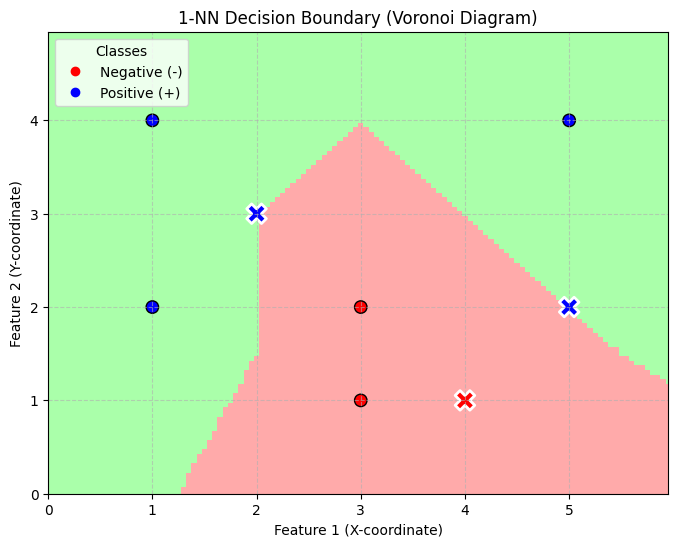


--- New Point Classification Results ---
Point [2. 3.]: Classified as Positive (+)
Point [4. 1.]: Classified as Negative (-)
Point [5. 2.]: Classified as Positive (+)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# --- 1. Data Preparation ---

# Training dataset: 5 points in 2D space
# Positive class (+): (1,2), (1,4), (5,4)
# Negative class (-): (3,1), (3,2)
X_pos = np.array([[1, 2], [1, 4], [5, 4]])
X_neg = np.array([[3, 1], [3, 2]])

# Combine feature data (X) and create labels (y)
X = np.vstack([X_pos, X_neg])
# Use 1 for Positive, 0 for Negative
y = np.array([1, 1, 1, 0, 0])

# Define custom colormaps for visualization
# cmap_light is for the decision regions (background)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
# cmap_bold is for the data points and new classification (foreground)
cmap_bold = ListedColormap(['#FF0000', '#0000FF']) # Red for Neg (0), Blue for Pos (1)

# --- 2. Train the 1-NN Model ---

# Initialize the K-Nearest Neighbors classifier with k=1
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

# --- 3. Plotting the Decision Boundary (Voronoi Diagram) ---

# Determine the grid boundaries (add padding)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generate a mesh grid of points spanning the feature space
h = 0.05 # Step size for the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Classify every point in the mesh grid using the 1-NN model
# np.c_ stacks the flattened arrays (xx and yy) column-wise
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the classification results (Z) to match the grid shape (xx)
Z = Z.reshape(xx.shape)

# Create the plot figure
plt.figure(figsize=(8, 6))

# Plot the colored regions (decision boundary)
# The boundaries between colors represent the 1-NN decision boundaries
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot the original training data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                      edgecolor='k', s=80, label='Training Data')

# --- 4. Visual Classification of New Points ---

# Define new points to classify visually
new_points = np.array([
    [2.0, 3.0], # Should be classified as Positive (closer to (1,4))
    [4.0, 1.0], # Should be classified as Negative (closer to (3,1))
    [5.0, 2.0]  # Should be classified as Positive (closer to (5,4))
])
new_predictions = clf.predict(new_points)

# Plot the new points with distinct markers
plt.scatter(new_points[:, 0], new_points[:, 1], c=new_predictions, cmap=cmap_bold,
            marker='X', s=200, edgecolor='white', linewidth=2, label='New Points')

# --- 5. Chart Setup and Labels ---
plt.title("1-NN Decision Boundary (Voronoi Diagram)")
plt.xlabel("Feature 1 (X-coordinate)")
plt.ylabel("Feature 2 (Y-coordinate)")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Create legend handles and labels
legend_handles, _ = scatter.legend_elements()
legend_labels = ['Negative (-)', 'Positive (+)']
plt.legend(legend_handles, legend_labels, title="Classes", loc="upper left")

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 6. Print New Point Prediction Results (Text Output) ---
print("\n--- New Point Classification Results ---")
for point, pred in zip(new_points, new_predictions):
    class_label = "Positive (+)" if pred == 1 else "Negative (-)"
    print(f"Point {point}: Classified as {class_label}")

2.

A. Classification Results Before Scaling

Without feature scaling, the Euclidean distance used by the K-NN algorithm is influenced by feature dimensions. In this example, the first feature (X-axis, range 100-500) exhibits far greater variation than the second feature (Y-axis, range 1-4). Consequently, the nearest neighbor determination for the classification point $(500, 1)$ is almost entirely determined by differences along the X-axis. Calculations show that the positive point $(500, 4)$ is the closest neighbor (distance 3), resulting in a positive classification.

B. Classification Results After Scaling

After Min-Max normalization of all features (scaling to the range $[0, 1]$), both features contribute equally to the distance calculation. The normalized point becomes $(1, 0)$. At this point, the nearest neighbor shifts from absolute spatial position to relative position. The closest neighbor now becomes the normalized form $(0.5, 0)$ of the negative example point $(300, 1)$, with a distance of only 0.5. Consequently, the classification result changes to Negative. This example underscores the necessity of feature scaling to prevent highly variable features from dominating distance calculations.

3.

When test points $X_{test}$ lack certain features, two primary approaches exist:

Weighted Distance Based on Shared Features: The most straightforward method calculates distances only on feature dimensions present in both the test and training points. To compensate for missing dimensions, the computed distances are typically weighted or normalized—e.g., divided by or multiplied with the proportion of missing features. This approach assumes missing features contribute equally to distance calculations.

Data Imputation: Before classification, missing features in $X_{test}$ are filled with an estimated value. Common estimates include the mean or median of the feature across the entire training set. After imputation, standard Euclidean distance formulas can be used for K-NN calculations.

4.

Theoretically, K-NN faces the curse of dimensionality in high-dimensional data, as the meaningfulness of distance calculations diminishes with increasing dimensions. However, K-NN remains effective for image data with thousands of pixels due to the low intrinsic dimensionality of image data. Although images have high environmental dimensionality (number of pixels), image data points are actually distributed on a low-dimensional **manifold**. For instance, variations in all cat images may be governed by only dozens of latent factors (posture, lighting). Since adjacent pixels in images are highly correlated, data points do not scatter uniformly across high-dimensional space but cluster on this low-dimensional manifold. Consequently, the principle of locality—where nearest neighbors belong to the same category—remains valid.

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

1.

Yes, computing $h(x) = \text{sign}(\mathbf{w} \cdot \mathbf{x})$ for each sample $(\mathbf{x}, y)$ in the training set $D_{TR}$ and test set $D_{TE}$ is a necessary step for calculating the two error values, thereby determining whether the test error exceeds the training error. The function $h(\mathbf{x}) = \text{sign}(\mathbf{w} \cdot \mathbf{x})$ is the hypothesis function ultimately learned by the perceptron. The error rate (or classification error) on any dataset ($D$) is defined as the proportion of misclassified points: $$E_{out} \text { or } E_{in} = \frac{1}{|D|} \sum_{(\mathbf{x}, y) \in D} \mathbf{1}[h(\mathbf{x}) \neq y]$$ where $\mathbf{1}[\cdot]$ denotes the indicator function. To compute the training error ($E_{in}$) and test error ($E_{out}$), first compute the prediction $h(\mathbf{x})$ for each data point in $D_{TR}$ and $D_{TE}$, compare it with the true label $y$, and count the misclassified instances. Directly comparing the resulting error rates confirms that $E_{out} > E_{in}$.

2.

During the training phase of the Primitive Perceptron Learning Algorithm (PLA), there is no need to explicitly compute the training error. This is because the algorithm's update rules are entirely driven by the presence of misclassified points, rather than the overall error rate.

**The PLA Update Rule:** The perceptron iterates through the training set, updating weights only when encountering a misclassified point $(\mathbf{x}_i, y_i)$ (i.e., when $y_i(\mathbf{w} \cdot \mathbf{x}_i) \leq 0$): $\mathbf{w} \leftarrow \mathbf{w} + y_i \mathbf{x}_i$.

**Termination Condition**: The algorithm terminates immediately upon completing the training data traversal without encountering any misclassified points. This termination condition implies that the training error ($E_{in}$) is zero (assuming the data is linearly separable).

**Error-Correction Focus**: Unlike gradient descent and other algorithms that minimize cost functions dependent on total error (such as mean squared error or cross-entropy), PLA is a constructive algorithm focused on correcting errors one by one. As long as the error is non-zero, the algorithm explicitly knows which errors to correct, and the precise error count is irrelevant for subsequent steps.

Therefore, for standard PLA, there is no need to compute the error value—only determine whether the error is greater than zero (continue training) or equal to zero (terminate training).

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [2]:
import numpy as np

# --- 1. Dataset and Initial Parameters ---

# Training Data:
# Positive class (y=1): x1 = (10, -2)
# Negative class (y=-1): x2 = (12, 2)

# Feature vectors (including implicit bias term if needed, but for simplicity
# and based on the problem's w=(w1, w2) structure, we will treat this as
# a non-augmented 2D feature space with an origin-passing boundary).
X = np.array([[10, -2], [12, 2]])
Y = np.array([1, -1]) # Corresponding labels

# Initial weight vector: w0 = (0, 0)
W = np.array([0, 0], dtype=float)
learning_rate = 1

# List to store the sequence of weight vectors
W_history = [W.copy()]
update_count = 0
converged = False
max_iterations = 100 # Safety limit

# --- 2. Perceptron Learning Algorithm (PLA) ---

print("--- Perceptron Learning Algorithm Simulation ---")
print(f"Initial W0: {W}")
print(f"Data Points: Positive (X1={X[0]}), Negative (X2={X[1]})")
print("-" * 40)

for iteration in range(max_iterations):
    # Flag to check if any update was made in this full pass (epoch)
    updates_made_in_epoch = False

    for i in range(len(X)):
        x_i = X[i]
        y_i = Y[i]

        # Check for misclassification: y * (w dot x) <= 0
        prediction_sign = np.dot(W, x_i)

        # Check for error (Misclassified condition: y * (w dot x) <= 0)
        if y_i * prediction_sign <= 0:

            # --- MISCLASSIFICATION FOUND: Perform Update ---

            updates_made_in_epoch = True
            update_count += 1

            # Update rule: W_new = W_old + learning_rate * y * x
            W_new = W + learning_rate * y_i * x_i

            # Print update step details
            print(f"Update {update_count}:")
            print(f"  Point X{i+1}={x_i}, Label={y_i}, W_old={W}")
            print(f"  Dot Product: {y_i} * ({prediction_sign:.0f}) = {y_i * prediction_sign:.0f} (<= 0)")
            print(f"  W_new = {W} + {y_i} * {x_i} = {W_new}")

            W = W_new.copy()
            W_history.append(W.copy())

            print(f"  W{update_count} = {W}")

    # --- Check for Convergence ---
    # The algorithm converges if a full pass over the data yields no updates.
    if not updates_made_in_epoch:
        converged = True
        break

    # Optional: print end of epoch
    # print(f"\n--- End of Epoch {iteration + 1}, Current W: {W} ---\n")

if converged:
    print("-" * 40)
    print(f"PLA converged in {iteration + 1} epochs.")
    print(f"Total number of updates required: {update_count}")
    print(f"Final converged weight vector W_final: {W}")
else:
    print("-" * 40)
    print(f"Algorithm did not converge after {max_iterations} iterations. Current W: {W}")

# --- 3. Final Results Summary ---

print("\n--- Sequence of W_i Vectors ---")
for idx, w_vec in enumerate(W_history):
    print(f"W{idx}: {w_vec}")

--- Perceptron Learning Algorithm Simulation ---
Initial W0: [0. 0.]
Data Points: Positive (X1=[10 -2]), Negative (X2=[12  2])
----------------------------------------
Update 1:
  Point X1=[10 -2], Label=1, W_old=[0. 0.]
  Dot Product: 1 * (0) = 0 (<= 0)
  W_new = [0. 0.] + 1 * [10 -2] = [10. -2.]
  W1 = [10. -2.]
Update 2:
  Point X2=[12  2], Label=-1, W_old=[10. -2.]
  Dot Product: -1 * (116) = -116 (<= 0)
  W_new = [10. -2.] + -1 * [12  2] = [-2. -4.]
  W2 = [-2. -4.]
Update 3:
  Point X1=[10 -2], Label=1, W_old=[-2. -4.]
  Dot Product: 1 * (-12) = -12 (<= 0)
  W_new = [-2. -4.] + 1 * [10 -2] = [ 8. -6.]
  W3 = [ 8. -6.]
Update 4:
  Point X2=[12  2], Label=-1, W_old=[ 8. -6.]
  Dot Product: -1 * (84) = -84 (<= 0)
  W_new = [ 8. -6.] + -1 * [12  2] = [-4. -8.]
  W4 = [-4. -8.]
Update 5:
  Point X1=[10 -2], Label=1, W_old=[-4. -8.]
  Dot Product: 1 * (-24) = -24 (<= 0)
  W_new = [-4. -8.] + 1 * [10 -2] = [  6. -10.]
  W5 = [  6. -10.]
Update 6:
  Point X2=[12  2], Label=-1, W_old=[  6

### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [4]:
import numpy as np

# --- 1. Define Initial Weight and Update Log ---

# Initial weight vector w0 = (0, 0, 0, 0, 0)
w_0 = np.array([0, 0, 0, 0, 0], dtype=float)

# The update log is parsed into a list of tuples: (count * y, feature_vector)
# Since the learning rate (eta) is 1, the contribution is directly (count * y * x).
updates_log = [
    # +4 * (0, 0, 0, 0, 4)
    (4, np.array([0, 0, 0, 0, 4])),
    # +12 * (0, 0, 6, 5, 0)
    (12, np.array([0, 0, 6, 5, 0])),
    # +11 * (3, 0, 0, 0, 0)
    (11, np.array([3, 0, 0, 0, 0])),
    # -11 * (0, 9, 3, 6, 0)
    (-11, np.array([0, 9, 3, 6, 0])),
    # -11 * (0, 1, 0, 2, 5)
    (-11, np.array([0, 1, 0, 2, 5]))
]

# --- 2. Calculate the Total Change in Weights (Delta_w) ---

# Delta_w = sum(count * y * x)
delta_w = np.zeros_like(w_0, dtype=float)

print("--- Contribution of Each Update ---")
for count_y, x in updates_log:
    # Calculate the scaled contribution for this set of misclassified points
    contribution = count_y * x
    delta_w += contribution
    print(f"  {count_y:+d} * {x} = {contribution}")

# --- 3. Compute the Final Weight Vector ---

# W_final = W_0 + Delta_w
w_final = w_0 + delta_w

# --- 4. Output Results ---

print("-" * 30)
print(f"Initial Weight W0: {w_0}")
print(f"Total Weight Change ΔW: {delta_w}")
print(f"Final Weight W_final: {w_final}")


--- Contribution of Each Update ---
  +4 * [0 0 0 0 4] = [ 0  0  0  0 16]
  +12 * [0 0 6 5 0] = [ 0  0 72 60  0]
  +11 * [3 0 0 0 0] = [33  0  0  0  0]
  -11 * [0 9 3 6 0] = [  0 -99 -33 -66   0]
  -11 * [0 1 0 2 5] = [  0 -11   0 -22 -55]
------------------------------
Initial Weight W0: [0. 0. 0. 0. 0.]
Total Weight Change ΔW: [  33. -110.   39.  -28.  -39.]
Final Weight W_final: [  33. -110.   39.  -28.  -39.]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

--- Starting Perceptron Convergence Simulation ---


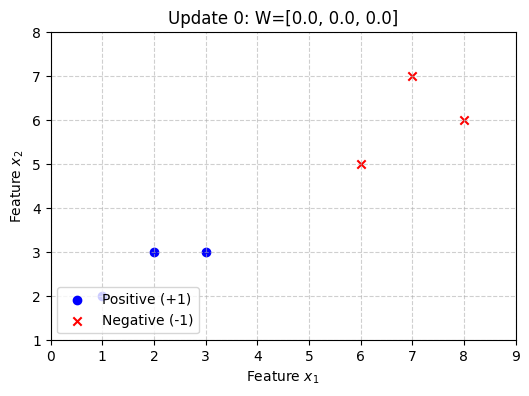

Epoch 1: Misclassified point X1=[1 2] (y=1). Updating W...


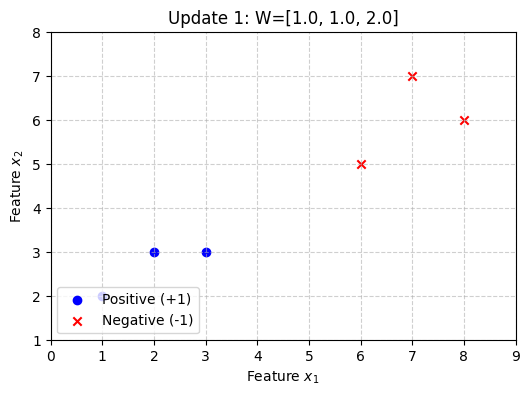

Epoch 1: Misclassified point X4=[6 5] (y=-1). Updating W...


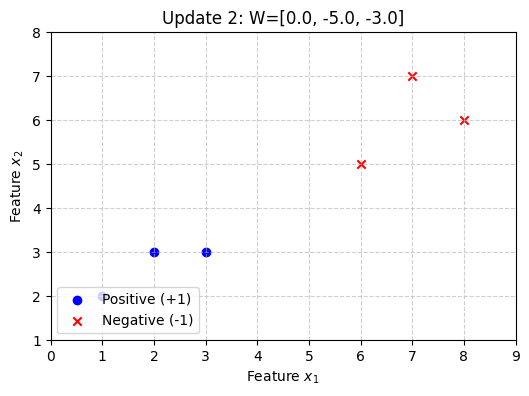

Epoch 2: Misclassified point X1=[1 2] (y=1). Updating W...


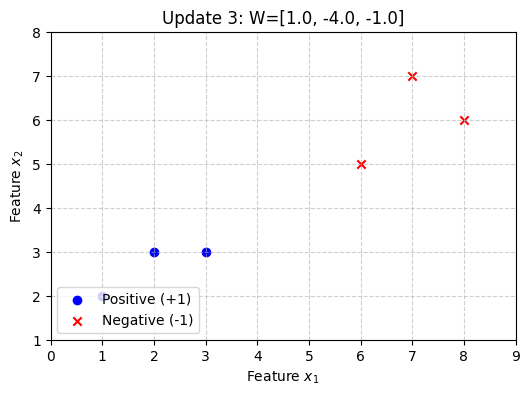

Epoch 2: Misclassified point X2=[2 3] (y=1). Updating W...


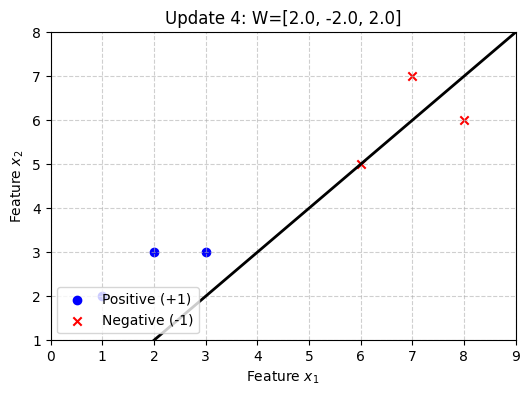

Epoch 2: Misclassified point X4=[6 5] (y=-1). Updating W...


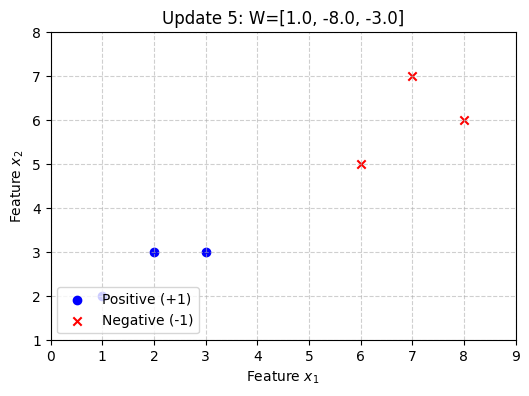

Epoch 3: Misclassified point X1=[1 2] (y=1). Updating W...


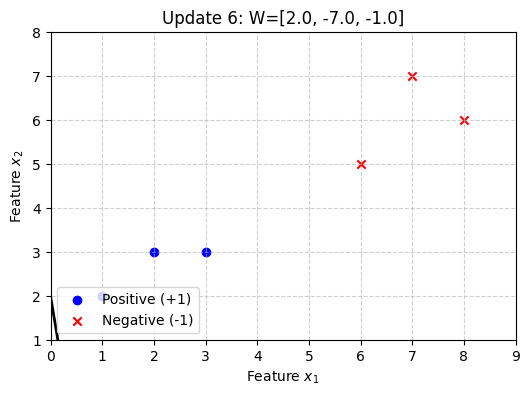

Epoch 3: Misclassified point X2=[2 3] (y=1). Updating W...


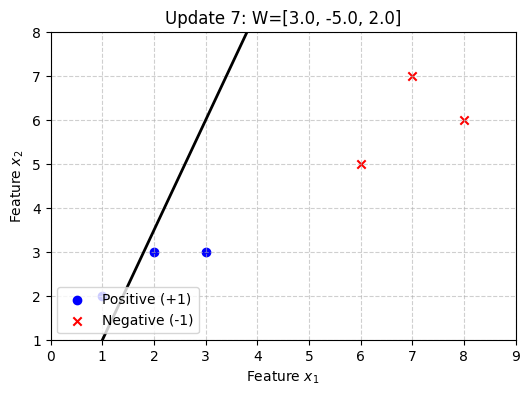

Epoch 3: Misclassified point X3=[3 3] (y=1). Updating W...


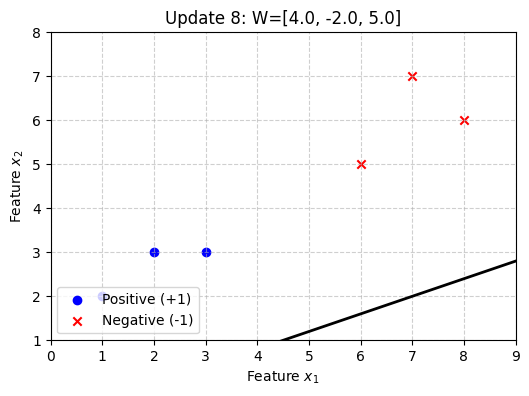

Epoch 3: Misclassified point X4=[6 5] (y=-1). Updating W...


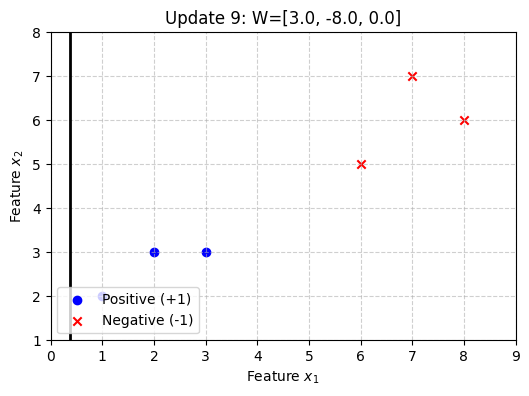

Epoch 4: Misclassified point X1=[1 2] (y=1). Updating W...


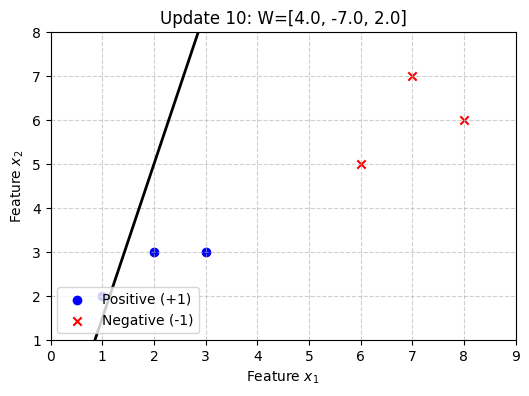

Epoch 4: Misclassified point X2=[2 3] (y=1). Updating W...


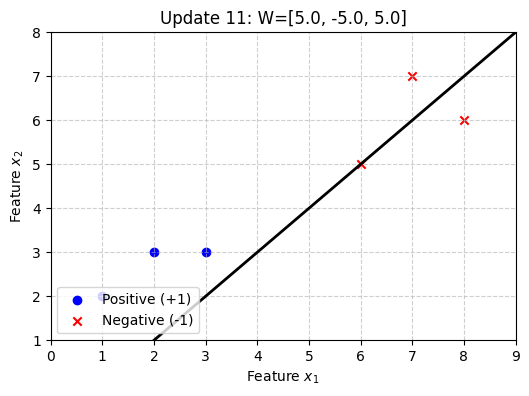

Epoch 4: Misclassified point X4=[6 5] (y=-1). Updating W...


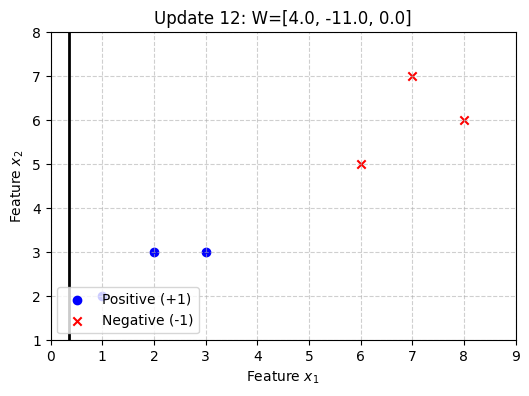

Epoch 5: Misclassified point X1=[1 2] (y=1). Updating W...


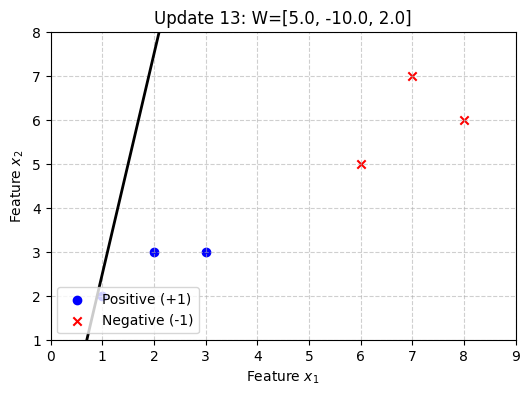

Epoch 5: Misclassified point X2=[2 3] (y=1). Updating W...


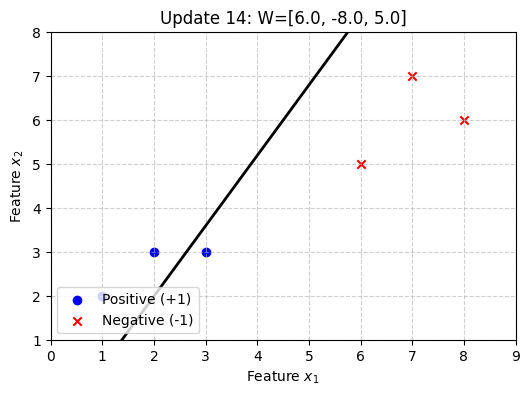

Epoch 5: Misclassified point X3=[3 3] (y=1). Updating W...


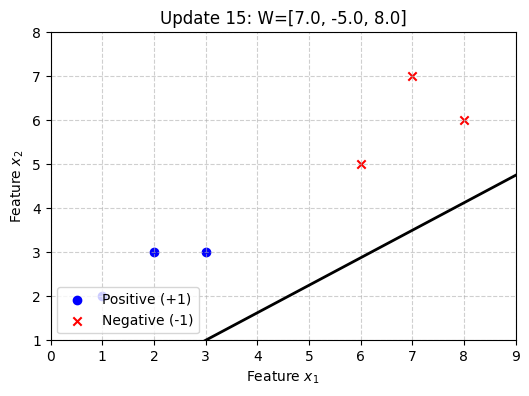

Epoch 5: Misclassified point X4=[6 5] (y=-1). Updating W...


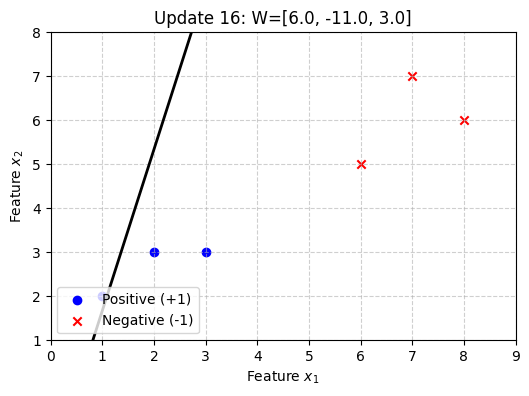

Epoch 6: Misclassified point X2=[2 3] (y=1). Updating W...


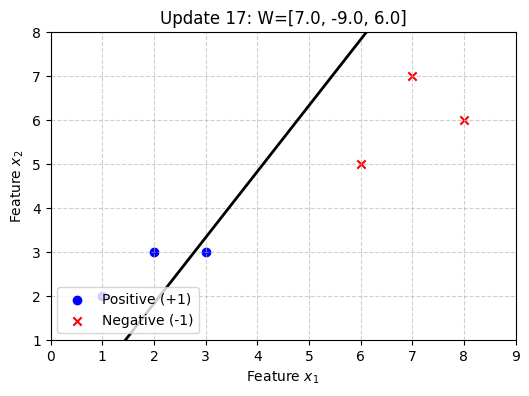

Epoch 6: Misclassified point X3=[3 3] (y=1). Updating W...


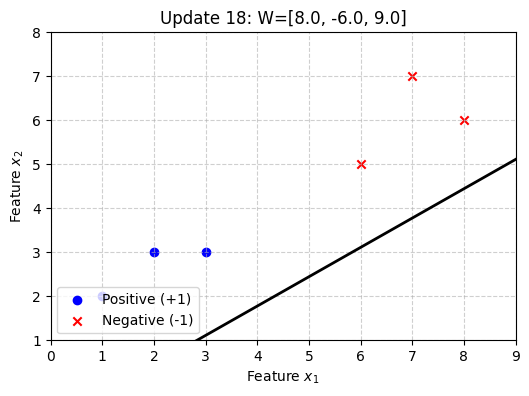

Epoch 6: Misclassified point X4=[6 5] (y=-1). Updating W...


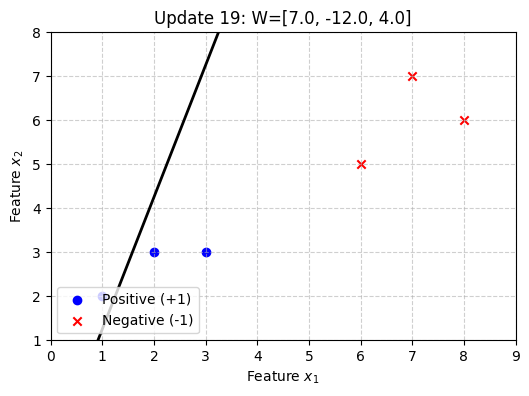

Epoch 7: Misclassified point X2=[2 3] (y=1). Updating W...


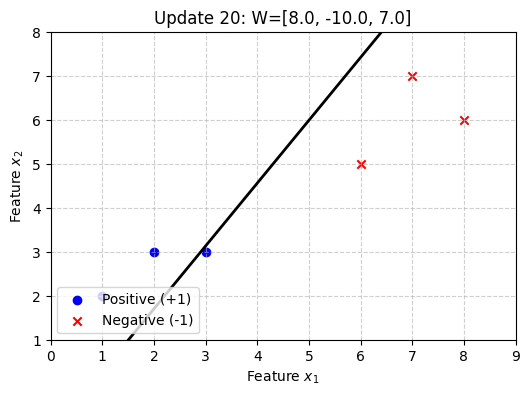

Epoch 7: Misclassified point X3=[3 3] (y=1). Updating W...


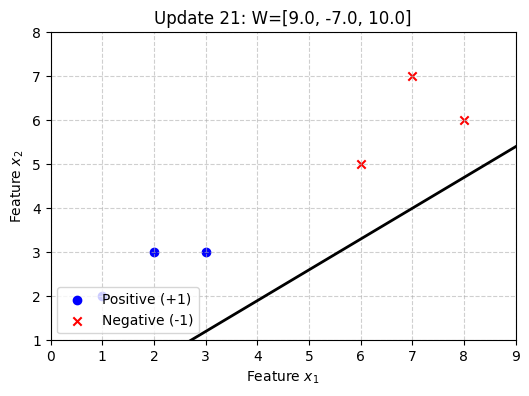

Epoch 7: Misclassified point X4=[6 5] (y=-1). Updating W...


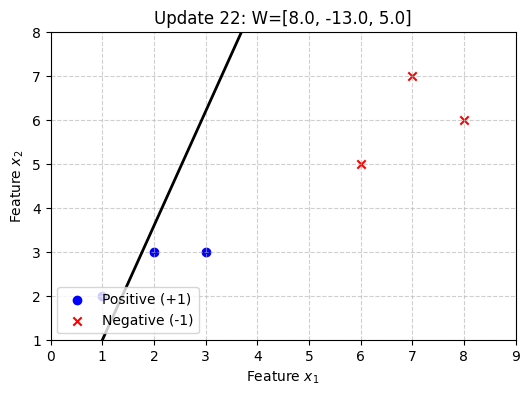

Epoch 8: Misclassified point X2=[2 3] (y=1). Updating W...


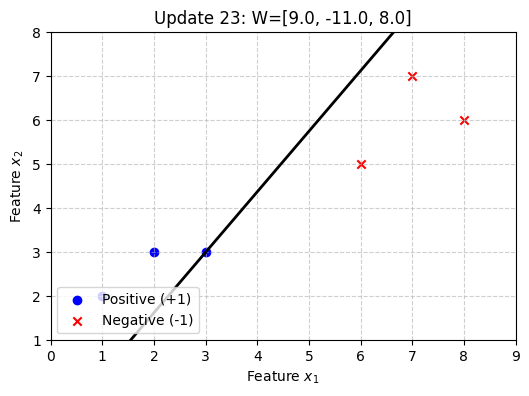

Epoch 8: Misclassified point X3=[3 3] (y=1). Updating W...


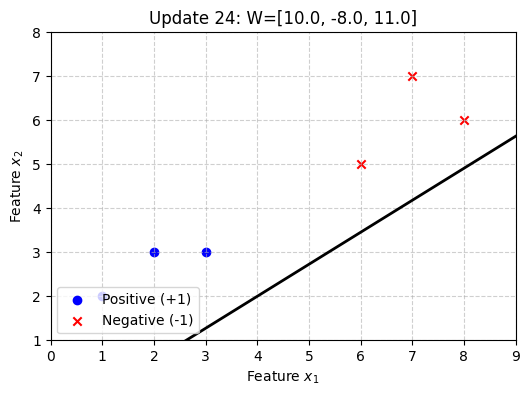

Epoch 8: Misclassified point X4=[6 5] (y=-1). Updating W...


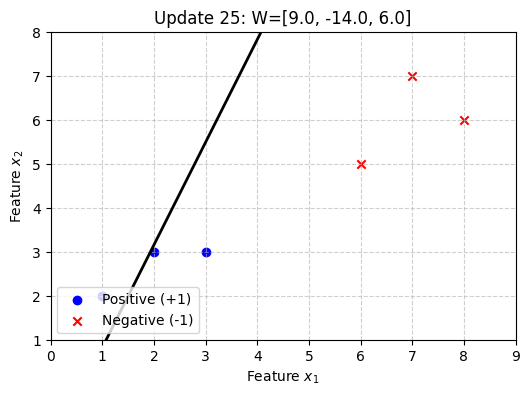

Epoch 9: Misclassified point X2=[2 3] (y=1). Updating W...


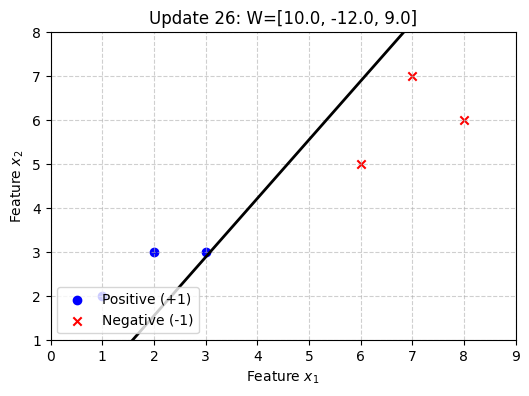


*** CONVERGENCE ACHIEVED ***
Final Weights W: [ 10. -12.   9.]
Total Updates: 26


array([ 10., -12.,   9.])

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Dataset Definition ---

# Define a small, linearly separable 2D dataset
# Format: (x1, x2)
X_pos_raw = np.array([
    [1, 2], [2, 3], [3, 3]
])
X_neg_raw = np.array([
    [6, 5], [7, 7], [8, 6]
])

X_raw = np.vstack((X_pos_raw, X_neg_raw))
Y = np.array([1, 1, 1, -1, -1, -1])

# Augment features by inserting x0=1 (for the bias term w0)
X = np.insert(X_raw, 0, 1, axis=1) # X format: (1, x1, x2)

# --- 2. Visualization Helper Function (Optimized for Notebook Output) ---

def plot_current_boundary(w_current, count, X_pos_data, X_neg_data, x_range, y_range):
    """
    Plots the boundary and displays the figure directly.
    """
    # Create a new figure for each step
    fig, ax = plt.subplots(figsize=(6, 4))

    x_min, x_max = x_range
    y_min, y_max = y_range

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('Feature $x_1$')
    ax.set_ylabel('Feature $x_2$')
    ax.grid(True, linestyle='--', alpha=0.6)

    # Plot data points
    ax.scatter(X_pos_data[:, 0], X_pos_data[:, 1], color='blue', marker='o', label='Positive (+1)')
    ax.scatter(X_neg_data[:, 0], X_neg_data[:, 1], color='red', marker='x', label='Negative (-1)')
    ax.legend(loc='lower left')

    w0, w1, w2 = w_current.round(4)
    title = f'Update {count}: W=[{w0}, {w1}, {w2}]'

    # Decision boundary calculation
    # Boundary: w0 + w1*x1 + w2*x2 = 0
    if not np.isclose(w2, 0):
        # Standard oblique line: x2 = - (w0 + w1*x1) / w2
        x1_line = np.array([x_min, x_max])
        x2_line = -(w0 + w1 * x1_line) / w2
        ax.plot(x1_line, x2_line, 'k-', lw=2, label='Decision Boundary')
    elif not np.isclose(w1, 0):
        # Vertical boundary: x1 = -w0 / w1
        x1_val = -w0 / w1
        ax.axvline(x=x1_val, color='k', linestyle='-', lw=2, label='Decision Boundary')

    ax.set_title(title)

    # Display the plot in the output cell
    plt.show()
    # Close the figure handle to prevent memory accumulation in a loop
    plt.close(fig)


# --- 3. Perceptron Algorithm Core Implementation ---

def run_perceptron_visualization(X, Y, X_raw_pos, X_raw_neg, eta=1):
    """
    Runs PLA, plotting the boundary after every weight update.
    """
    w = np.zeros(X.shape[1], dtype=float)
    update_count = 0
    max_epochs = 100

    # Define plotting range
    x_min, x_max = X_raw[:, 0].min() - 1, X_raw[:, 0].max() + 1
    y_min, y_max = X_raw[:, 1].min() - 1, X_raw[:, 1].max() + 1
    x_range = (x_min, x_max)
    y_range = (y_min, y_max)

    print("--- Starting Perceptron Convergence Simulation ---")

    # Plot the initial boundary (Update 0)
    plot_current_boundary(w, update_count, X_raw_pos, X_raw_neg, x_range, y_range)

    for epoch in range(max_epochs):
        misclassified_count = 0

        for i, (x_n, y_n) in enumerate(zip(X, Y)):
            score = np.dot(w, x_n)

            if y_n * score <= 0:
                # --- Misclassification found, perform update ---

                # Print log before update
                print(f"Epoch {epoch+1}: Misclassified point X{i+1}={x_n[1:]} (y={y_n}). Updating W...")

                # Update weights
                w += eta * y_n * x_n
                update_count += 1
                misclassified_count += 1

                # Plot and display the boundary immediately after the update
                plot_current_boundary(w, update_count, X_raw_pos, X_raw_neg, x_range, y_range)

        if misclassified_count == 0:
            print(f"\n*** CONVERGENCE ACHIEVED ***")
            print(f"Final Weights W: {w.round(4)}")
            print(f"Total Updates: {update_count}")
            break

    if misclassified_count > 0:
        print(f"\n*** DID NOT CONVERGE after {max_epochs} epochs ***")

    return w

# --- 4. Run the Code ---
run_perceptron_visualization(X, Y, X_pos_raw, X_neg_raw)